In [1]:
#import pandas and numpy packages
import pandas as pd
import numpy as np

In [2]:
#import the dataset that will be used in this project
from sklearn.datasets import load_iris

In [3]:
#load the data package
data_package = load_iris()

In [4]:
#check the keys of the dictionary (dataset)
keys = data_package.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#extract the dataset
data = pd.DataFrame(data_package['data'])

In [6]:
#extract the targets
target = pd.DataFrame(data_package['target'])

In [7]:
#extract the target names
target_names = pd.DataFrame(data_package['target_names'])
print(target_names)

            0
0      setosa
1  versicolor
2   virginica


In [8]:
#extract the features names
feature_names = pd.DataFrame(data_package['feature_names'])
print(feature_names)

                   0
0  sepal length (cm)
1   sepal width (cm)
2  petal length (cm)
3   petal width (cm)


In [9]:
#print out the descriptions of the datasets
print(data_package['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
#print the first few lines of the data set to examine the data set 
print(data.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [11]:
#generate the key stats of the data to gain a general understanding of the dataset 
print(data.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [12]:
#data check for target data frame
print(target.describe())
print(pd.Series(target[0]).value_counts())

                0
count  150.000000
mean     1.000000
std      0.819232
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      2.000000
2    50
1    50
0    50
Name: 0, dtype: int64


### Observation
We can see that there is no missing value in the attributes (input) as well as the target. For target, the values lie within 0, 1, 2 which stand for setosa, versicolor and virginica. 

In [13]:
#import matplotlib and seaborn library for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

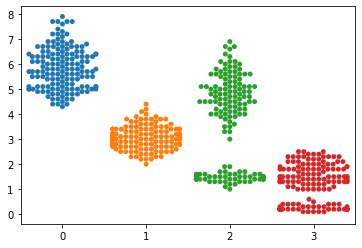

In [14]:
#plot the swamplots for the attributes to gain a visual understanding of the data
sns.swarmplot(data=data)

### Data integrity check
We understand from feature names that <br />
0  sepal length (cm)<br />
1   sepal width (cm)<br />
2  petal length (cm)<br />
3   petal width (cm)<br />

Although petal length and petal width seem to have 2 separate clusters, no apparent outliers are observed for the 4 attributes. Hence


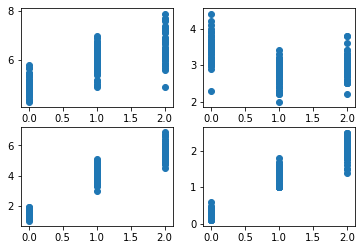

In [15]:
#plot a scatterplot against the target for each individual attribute
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(target,data[0])
axs[0,1].scatter(target,data[1])
axs[1,0].scatter(target,data[2])
axs[1,1].scatter(target,data[3])

### Observations
From the scatter plots, we can see that the individual iris seem to have their specific range of the attributes.

### Models to use
As this is classification prediction, based on the observations above, propose to use KNeighborsClassifier (KNN) as well as Random Forest Classifier models for the prediction of the classification.

In [16]:
#import the necessary library/packages for the ML model
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
#to standard scale the attribute data so each attribute will not have unproportionate influence on the model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [18]:
#check the scaled_data
print(scaled_data.mean())

-1.4684549872375404e-15


In [19]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data,target[0],random_state=42)

In [20]:
#initiate KNN model and fit the train data into the model
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
print(KNN.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [22]:
print(KNN.score(X_test,y_test))

1.0


100% accuracy?! Seems like this KNN model is doing well eh?